# Traitement automatique des données Poids (Withings HealthMate),
# Food (MyFitnessPal), et Exercices (Polar)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from zipfile import ZipFile

import datetime
import json
import re
import shutil

from tqdm import tqdm

import seaborn as sns

import ipywidgets
import os

In [2]:
# ici, aller chercher dans Download
# les fichiers commençant par data-user... , data_BEN..., etc.
# repérer les plus récents (= derniers downloads)
# et copier ces plus récents dans imports avec le nom qui va bien

# voir :
# os.listdir : liste fichiers
# os.stat_result : donne infos sur fichier x (dont date dernière modif)
# shutil.copy : copie fichier endroit X à l'endroit Y

downloads_rep = "/home/benjamin/Downloads/"
liste_downloaded_files = os.listdir(downloads_rep)

if len(liste_downloaded_files) == 0:
    raise NameError(f"Aucun fichier n'est présent dans {downloads_rep}")

In [3]:
# recherche fichiers POIDS : format data_BEN_xxxxxx.zip

# Source : Withings https://healthmate.withings.com/

# Account > User > Parameters > Download ==> data_BEN_xxxxx.zip ==> contient weight.csv

pattern_poids = "^data_BEN_[\d]+[.]zip"
eng = re.compile(pattern_poids)
liste_zip_poids = []
liste_mtime_zips = []

for f in liste_downloaded_files:
    m = eng.search(f)
    if m:  # si on trouve un data_BEN_dddd.zip, on note le nom du fichier et le temps de modif
        filename = m.group(0)
        liste_zip_poids.append(filename)
        mtime = os.stat(downloads_rep + f).st_mtime
        liste_mtime_zips.append(mtime)
        
if len(liste_zip_poids) == 0:
    raise NameError(f'Aucun fichier de type data_BEN_xxxx.zip contenant \
        les données poids ne figure dans le répertoire {downloads_rep}')
    
# print(liste_zip_poids)

idx = np.argmax(liste_mtime_zips)
filename_poids = liste_zip_poids[idx]

print(f"Le fichier poids le plus récent est : {filename_poids}, parmi :\n")
for f in liste_zip_poids:
    print(f"{f}")

Le fichier poids le plus récent est : data_BEN_1681448693.zip, parmi :

data_BEN_1681448693.zip
data_BEN_1681275968.zip
data_BEN_1681372918.zip
data_BEN_1681016466.zip
data_BEN_1680845762.zip
data_BEN_1681189208.zip
data_BEN_1680931000.zip
data_BEN_1681105654.zip
data_BEN_1680750277.zip


In [4]:
# recherche fichiers FOOD : format File-Export-YYYY-MM-DD-to-YYYY-MM-DD.zip

# https://www.myfitnesspal.com/reports

# www.myfitnesspal.com ==> reports > export data ==> File-Export-date1-to-date2.zip

pattern_food = "^File-Export-[\d]{4}-[\d]{2}-[\d]{2}-to-[\d]{4}-[\d]{2}-[\d]{2}.*[.]zip"
eng = re.compile(pattern_food)
liste_zip_food = []
liste_mtime_zips = []

for f in liste_downloaded_files:
    m = eng.search(f)
    if m:  # si on trouve un File-Export-....zip, on note le nom du fichier et le temps de modif
        filename = m.group(0)
        liste_zip_food.append(filename)
        mtime = os.stat(downloads_rep + f).st_mtime
        liste_mtime_zips.append(mtime)
        
if len(liste_zip_food) == 0:
    raise NameError(f'Aucun fichier de type File-Export-xxxx.zip contenant \
        les données food ne figure dans le répertoire {downloads_rep}')
    
# print(liste_zip_food)

idx = np.argmax(liste_mtime_zips)
filename_food = liste_zip_food[idx]

print(f"Le fichier food le plus récent est : {filename_food}, parmi \n")

for f in liste_zip_food:
    print(f"{f}")

Le fichier food le plus récent est : File-Export-2020-08-03-to-2023-04-14.zip, parmi 

File-Export-2020-08-03-to-2023-04-08.zip
File-Export-2020-08-03-to-2023-04-12.zip
File-Export-2020-08-03-to-2023-04-06.zip
File-Export-2020-08-03-to-2023-04-11.zip
File-Export-2020-08-03-to-2023-04-09.zip
File-Export-2020-08-03-to-2023-04-10.zip
File-Export-2020-08-03-to-2023-04-07.zip
File-Export-2020-08-03-to-2023-04-13.zip
File-Export-2020-08-03-to-2023-04-14.zip


In [5]:
# recherche fichiers EXO par POLAR : format polar-user-data-export.zip

# https://account.polar.com/#export ==> polar-user-data-export-xxxxx.zip

pattern_polar = "^polar-user-data-export_.+[.]zip"
eng = re.compile(pattern_polar)
liste_zip_polar = []
liste_mtime_zips = []

for f in liste_downloaded_files:
    m = eng.search(f)
    if m:  # si on trouve un polar-user-data-export_....zip, on note le nom du fichier et le temps de modif
        filename = m.group(0)
        liste_zip_polar.append(filename)
        mtime = os.stat(downloads_rep + f).st_mtime
        liste_mtime_zips.append(mtime)
        
if len(liste_zip_polar) == 0:
    raise NameError(f'Aucun fichier de type polar-user-data-export_xxxx.zip contenant \
        les données exercices de Polar ne figure dans le répertoire {downloads_rep}')
    
# print(liste_zip_polar)

idx = np.argmax(liste_mtime_zips)
filename_polar = liste_zip_polar[idx]

print(f"Le fichier exercices le plus récent est : {filename_polar}, parmi :\n")

for f in liste_zip_polar:
    print(f"{f}")

Le fichier exercices le plus récent est : polar-user-data-export_30ce1a1f-a9e0-43e2-8d76-0772fbad198f.zip, parmi :

polar-user-data-export_30ce1a1f-a9e0-43e2-8d76-0772fbad198f.zip


In [6]:
# copie les trois fichiers sélectionnés dans le répertoire de travail

import_pathname = '/home/benjamin/Folders_Python/Weight_imports/'

src = [filename_food,
       filename_poids,
       filename_polar]

dst = ['food', 'poids', 'polar']

for s,d in zip(src, dst):
       shutil.copy(downloads_rep + s, import_pathname + d)
       
print(f"Utilise : {filename_food}, {filename_poids}, {filename_polar}")

Utilise : File-Export-2020-08-03-to-2023-04-14.zip, data_BEN_1681448693.zip, polar-user-data-export_30ce1a1f-a9e0-43e2-8d76-0772fbad198f.zip


In [7]:
# Récupère données POIDS

withings_filename = import_pathname + 'poids'  # fichier zip le plus récent de HealthMate Withings

with ZipFile(withings_filename, 'r') as weight_zip:
    weight_csv = weight_zip.extract('weight.csv', path=import_pathname)

# extrait la dataframe poids ----------------

colnames = ['Date', 'Poids (kg)', 'Gras (kg)', 'Masse osseuse (kg)', 'Masse musculaire (kg)', 'Hydratation (kg)']

df_weight = pd.read_csv(weight_csv, usecols=colnames)

os.remove(weight_csv)

df_weight.rename(columns = {'Poids (kg)' : 'Masse_Totale' , 
                            'Gras (kg)' : 'Masse_Grasse',
                            'Masse osseuse (kg)' : 'Masse_Osseuse',
                            'Masse musculaire (kg)' : 'Masse_Musculaire',
                            'Hydratation (kg)' : 'Masse_Hydrique'
                            }, 
                 inplace=True)

# transforme le champ str de Date en datetime object

date_format = '%Y-%m-%d %H:%M:%S'

df_weight['Date'] = df_weight['Date'].apply(lambda x : datetime.datetime.strptime(x, date_format).date())
df_weight = df_weight.groupby('Date').mean()

start_date = datetime.date(2020, 8, 1)  # on prend les data depuis le 1er Août 2020

df_weight = df_weight[df_weight.index >= start_date]

subset = ['Masse_Totale', 'Masse_Grasse']
df_weight.dropna(subset = subset, inplace=True)

# df_weight['Masse_Maigre'] = df_weight['Masse_Totale'] - df_weight['Masse_Grasse']
df_weight['MG%'] = df_weight['Masse_Grasse'] / df_weight['Masse_Totale']
df_weight['BMR'] = 370 + 21.6 * (df_weight['Masse_Totale'] - df_weight['Masse_Grasse'])

df_weight.sort_index(inplace=True)

In [8]:
# df_weight

In [9]:
df_weight.tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
Date,,,,,,,
2023-03-31,71.401429,11.254286,3.008571,57.117143,40.424286,0.157620,1669.178286
2023-04-01,71.580000,11.470000,3.008571,57.084286,40.335714,0.160240,1668.376000
2023-04-02,72.032857,11.028571,3.058571,57.927143,41.340000,0.153105,1687.692571
2023-04-03,72.578571,11.238571,3.074286,58.247143,41.608571,0.154847,1694.944000
2023-04-04,72.468571,11.021429,3.082857,58.352857,41.792857,0.152086,1697.258286
2023-04-05,73.163000,10.444000,3.165000,59.539000,43.343000,0.142750,1724.730400
2023-04-06,73.798333,10.683333,3.186667,59.913333,43.636667,0.144764,1733.284000
2023-04-07,73.425385,10.947692,3.143077,59.319231,42.863077,0.149100,1719.518154
2023-04-08,74.710000,11.745000,3.161667,59.791667,43.051667,0.157208,1730.044000


In [10]:
df_weight.rolling(window=7).mean().tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
Date,,,,,,,
2023-03-31,71.994082,11.461599,3.029592,57.487551,40.756871,0.159205,1677.501633
2023-04-01,71.992415,11.465170,3.029626,57.482211,40.751020,0.159259,1677.388490
2023-04-02,71.953027,11.435374,3.029218,57.472415,40.750816,0.158930,1677.181306
2023-04-03,71.948946,11.420272,3.030034,57.482211,40.766122,0.158731,1677.419347
2023-04-04,72.006837,11.383810,3.035680,57.570952,40.871531,0.158103,1679.457388
2023-04-05,72.224204,11.204789,3.059456,57.943463,41.331347,0.155171,1688.019363
2023-04-06,72.431823,11.020027,3.083503,58.311558,41.783014,0.152202,1696.494792
2023-04-07,72.720960,10.976228,3.102718,58.626142,42.131412,0.150984,1703.686202
2023-04-08,73.168103,11.015514,3.124589,59.012911,42.519406,0.150551,1712.495916


In [11]:
# Récupère données FOOD

mfp_filename = import_pathname + "food" # données de My Fitness Pal

# Extrait les archives
    
with ZipFile(mfp_filename, 'r') as food_zip:
    output_dir = food_zip.namelist()
    target = 'Nutrition-Summary'
    for l in output_dir:
        if l[:len(target)] == target:
            food_csv = food_zip.extract(l, path=import_pathname)
            break
        
# extrait la dataframe food -------------------------------

colnames = ['Date', 'Meal', 'Calories', 'Fat (g)', 'Carbohydrates (g)', 'Protein (g)']

df_food = pd.read_csv(food_csv, usecols=colnames)
os.remove(food_csv)

df_food.rename(columns = {'Fat (g)' : 'Lipides' , 'Carbohydrates (g)' : 'Glucides', 'Protein (g)' : 'Proteines'}, inplace=True)

In [12]:
# df_food.tail(15)

In [13]:
# transforme le champ str de Date en datetime object

date_format = '%Y-%m-%d'

df_food['Date'] = df_food['Date'].apply(lambda x : datetime.datetime.strptime(x, date_format).date())
df_food = df_food.groupby('Date').sum(numeric_only=True)

start_date = datetime.date(2020, 8, 1)  # on prend les data depuis le 1er Août 2020

df_food = df_food[df_food.index >= start_date]
df_food.dropna(inplace=True)
df_food.sort_index(inplace=True)

In [14]:
df_food.tail(15)

,Calories,Lipides,Glucides,Proteines
Date,,,,
2023-03-30,1604.8,43.3,148.9,150.4
2023-03-31,1983.3,35.8,224.7,162.9
2023-04-01,2469.1,46.6,315.0,138.0
2023-04-02,1967.6,56.6,132.1,182.9
2023-04-03,1707.6,43.9,145.1,166.0
2023-04-04,3444.4,93.4,453.6,172.9
2023-04-05,1725.8,54.2,143.9,150.8
2023-04-06,2803.1,77.4,305.4,189.7
2023-04-07,3502.7,107.9,398.3,216.0


In [15]:
df_food.rolling(window=7).mean().tail(15)

,Calories,Lipides,Glucides,Proteines
Date,,,,
2023-03-30,1979.857143,49.314286,196.542857,187.228571
2023-03-31,1909.057143,40.557143,203.600000,176.585714
2023-04-01,1921.200000,36.485714,215.971429,167.757143
2023-04-02,1918.800000,38.157143,203.871429,168.428571
2023-04-03,1916.742857,40.857143,201.600000,162.057143
2023-04-04,2148.285714,48.971429,237.585714,163.314286
2023-04-05,2128.942857,53.400000,223.328571,160.557143
2023-04-06,2300.128571,58.271429,245.685714,166.171429
2023-04-07,2517.185714,68.571429,270.485714,173.757143


In [16]:
def extract_data_training(exo_dict):
    # utility fonction pour récupérer : date, durée, type exercice et calories dépensées
    
    # récupère date
    pattern = '2(\d){3,3}-(\d){2,2}-(\d){2,2}'  # on cherche une date du type 2xxx-yy-zz
    p = re.compile(pattern)
    m = p.search(exo_dict.get('startTime'))
    if m: 
        time_format = '%Y-%m-%d'
        exo_date = datetime.datetime.strptime( exo_dict.get('startTime')[:10], time_format ).date()
    
    # récupère durée
    pattern = '(\d)+[.]?(\d)*'  # on cherche une durée du type xxxx.yyyy
    p = re.compile(pattern)
    m = p.search(exo_dict.get('duration'))
    if m:
        exo_duration = float(m.group())
    
    # récupère type activité et calories dépensées
    d = exo_dict.get('exercises')[0]   
    exo_type = d.get('sport')
    if d.get('kiloCalories'):
        exo_cals = float(d.get('kiloCalories'))
    else:
        exo_cals = 0.0
    
    return exo_date, exo_duration, exo_type, exo_cals

In [17]:
# Récupère les données EXERCICE

polar_filename = import_pathname + "polar"  # données de Polar

with ZipFile(polar_filename, 'r') as polar_zip:
    output_dir = polar_zip.namelist()
    
    target = 'training-session'
    dict_all_exos = {}
    for i, enr_name in enumerate(tqdm(output_dir)): # on parcourt la liste des archives
        if enr_name[:len(target)] == target:  # si c'est un enregistrement d'une session de training, on traite
            enr_json = polar_zip.extract(enr_name, path=import_pathname)   # extraction du json
            with open(enr_json, 'r') as f:
                exo_dict = json.load(f)
                exo_date, exo_duration, exo_type, exo_cals = extract_data_training(exo_dict)
                if dict_all_exos.get(exo_date) == None:
                    dict_all_exos[exo_date] = [ exo_duration, exo_cals]
                else:
                    dict_all_exos[exo_date] = [ dict_all_exos[exo_date][0] + exo_duration, dict_all_exos[exo_date][1] + exo_cals ]
                # print(f'exercice {i+1} : date = {exo_date}, durée = {exo_duration}, type = {exo_type}, cals = {exo_cals}')
            os.remove(enr_json)
    
    df_exos = pd.DataFrame.from_dict(dict_all_exos, orient='index', columns=['exo_duree', 'exo_cals_bruts']).sort_index()

100%|██████████| 783/783 [00:09<00:00, 78.76it/s]


In [18]:
df_exos.tail(15)

,exo_duree,exo_cals_bruts
2023-03-19,5010.589,442.0
2023-03-20,2940.487,374.0
2023-03-21,3840.000,255.0
2023-03-22,5483.485,396.0
2023-03-24,2482.365,367.0
2023-03-25,5580.836,480.0
2023-03-26,1860.838,241.0
2023-03-28,5344.471,630.0
2023-03-29,1881.342,288.0
2023-03-30,1800.000,120.0


In [19]:
# Ajout à la main des exos depuis le xx Janvier inclus pour palier à la fréquence de rafraîchissement de l'extraction Polar

# récupère fichier brut .csv
exos_persos_filename = "/home/benjamin/Folders_Python/Weight_imports/Exos_Persos.csv"
df_exos_persos = pd.read_csv(exos_persos_filename)

# convertit la colonne Jour en datetime objects en colonne Date
pattern_date = '[\d]{2}/[\d]{2}/[\d]{2}'
p = re.compile(pattern_date)

day_format = "%d/%m/%y"

df_exos_persos['Date'] = df_exos_persos['Jour'].apply( lambda x : datetime.datetime.strptime(p.search(x).group(0), day_format).date() )

# drope la colonne Jour, somme tous les exercices par date
df_exos_persos.drop(columns=['Jour'], inplace=True)

df_exos_persos = df_exos_persos.groupby('Date').sum()

# met au bon format la duree de l'exercice (minutes => secondes)
df_exos_persos['exo_duree'] = df_exos_persos['Duree'] * 60
df_exos_persos.drop(columns=['Duree'], inplace=True)

In [20]:
df_exos_persos

,exo_cals_bruts,exo_duree
Date,,
2023-04-05,868,7620
2023-04-06,979,8760
2023-04-07,200,3480
2023-04-08,378,4500
2023-04-09,222,2520
2023-04-10,447,3840
2023-04-11,817,7500
2023-04-12,0,0
2023-04-13,413,3540


In [21]:
# enfin, concatène avec le fichier issu de Polar
df_exos_total = pd.concat( [df_exos, df_exos_persos], axis=0 ).sort_index()

In [22]:
df_exos_total.tail(15)

,exo_duree,exo_cals_bruts
2023-03-30,1800.000,120.0
2023-03-31,2952.711,557.0
2023-04-01,5148.408,434.0
2023-04-02,7924.456,568.0
2023-04-03,8130.760,937.0
2023-04-04,5007.299,593.0
2023-04-05,7620.000,868.0
2023-04-06,8760.000,979.0
2023-04-07,3480.000,200.0
2023-04-08,4500.000,378.0


In [23]:
df_exos_total.rolling(window=7).mean().tail(15)

,exo_duree,exo_cals_bruts
2023-03-30,3490.476714,360.285714
2023-03-31,3128.937571,383.285714
2023-04-01,3509.800857,392.857143
2023-04-02,3844.603714,405.428571
2023-04-03,4740.306857,504.857143
2023-04-04,4692.139429,499.571429
2023-04-05,5511.947714,582.428571
2023-04-06,6506.233429,705.142857
2023-04-07,6581.560429,654.142857
2023-04-08,6488.930714,646.142857


In [24]:
df_all = pd.concat( [df_weight, df_food, df_exos_total], axis=1 ).sort_index()

# remplace les NaN dans les colonnes exercice par 0.0 : jour sans exercice
df_all['exo_duree'].fillna(0.0, inplace=True)
df_all['exo_cals_bruts'].fillna(0.0, inplace=True)

# drop les jours où il manque des données autres que les exercices
subset = ['Masse_Totale', 'Masse_Grasse', 'Calories']
df_all.dropna(subset = subset, inplace=True)

In [25]:
def exo_cals_nets(bmr, exo_duree, exo_cals_bruts):
    if exo_cals_bruts > 0:
        ecn = exo_cals_bruts - bmr / (24*60*60) * exo_duree
    else:
        ecn = 0.0
        
    return ecn

df_all['exo_cals_nets'] = np.where(df_all['exo_cals_bruts'] > 0, df_all['exo_cals_bruts'] - df_all['BMR'] / (24*60*60) * df_all['exo_duree'], 0 )

In [26]:
df_all['Depense_cal_totale'] = df_all['BMR'] + df_all['exo_cals_nets']
df_all['cal_deficit'] = df_all['Calories'] - (df_all['BMR'] + df_all['exo_cals_nets'])

In [27]:
# df_all.head(20)
# df_all.describe(include='all')
# df_all.info()

In [28]:
df_all.tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2023-03-30,72.345000,11.976667,3.018333,57.336667,40.475000,0.165549,1673.956000,1604.8,43.3,148.9,150.4,1800.000,120.0,85.125917,1759.081917,-154.281917
2023-03-31,71.401429,11.254286,3.008571,57.117143,40.424286,0.157620,1669.178286,1983.3,35.8,224.7,162.9,2952.711,557.0,499.956006,2169.134292,-185.834292
2023-04-01,71.580000,11.470000,3.008571,57.084286,40.335714,0.160240,1668.376000,2469.1,46.6,315.0,138.0,5148.408,434.0,334.584718,2002.960718,466.139282
2023-04-02,72.032857,11.028571,3.058571,57.927143,41.340000,0.153105,1687.692571,1967.6,56.6,132.1,182.9,7924.456,568.0,413.207806,2100.900378,-133.300378
2023-04-03,72.578571,11.238571,3.074286,58.247143,41.608571,0.154847,1694.944000,1707.6,43.9,145.1,166.0,8130.760,937.0,777.495569,2472.439569,-764.839569
2023-04-04,72.468571,11.021429,3.082857,58.352857,41.792857,0.152086,1697.258286,3444.4,93.4,453.6,172.9,5007.299,593.0,494.635651,2191.893937,1252.506063
2023-04-05,73.163000,10.444000,3.165000,59.539000,43.343000,0.142750,1724.730400,1725.8,54.2,143.9,150.8,7620.000,868.0,715.888361,2440.618761,-714.818761
2023-04-06,73.798333,10.683333,3.186667,59.913333,43.636667,0.144764,1733.284000,2803.1,77.4,305.4,189.7,8760.000,979.0,803.264261,2536.548261,266.551739
2023-04-07,73.425385,10.947692,3.143077,59.319231,42.863077,0.149100,1719.518154,3502.7,107.9,398.3,216.0,3480.000,200.0,130.741630,1850.259784,1652.440216
2023-04-08,74.710000,11.745000,3.161667,59.791667,43.051667,0.157208,1730.044000,1875.3,47.8,179.9,184.7,4500.000,378.0,287.893542,2017.937542,-142.637542


In [29]:
df_all.rolling(window=7).mean().tail(15)

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,Depense_cal_totale,cal_deficit
2023-03-30,72.049184,11.441190,3.034286,57.559592,40.837891,0.158800,1679.132653,1979.857143,49.314286,196.542857,187.228571,2707.121714,303.714286,251.184028,1930.316681,49.540462
2023-03-31,71.994082,11.461599,3.029592,57.487551,40.756871,0.159205,1677.501633,1909.057143,40.557143,203.600000,176.585714,2774.314000,330.857143,277.075645,1954.577278,-45.520135
2023-04-01,71.992415,11.465170,3.029626,57.482211,40.751020,0.159259,1677.388490,1921.200000,36.485714,215.971429,167.757143,2712.538571,324.285714,271.704403,1949.092893,-27.892893
2023-04-02,71.953027,11.435374,3.029218,57.472415,40.750816,0.158930,1677.181306,1918.800000,38.157143,203.871429,168.428571,3578.769714,371.000000,301.502643,1978.683949,-59.883949
2023-04-03,71.948946,11.420272,3.030034,57.482211,40.766122,0.158731,1677.419347,1916.742857,40.857143,201.600000,162.057143,4740.306857,504.857143,412.573439,2089.992786,-173.249928
2023-04-04,72.006837,11.383810,3.035680,57.570952,40.871531,0.158103,1679.457388,2148.285714,48.971429,237.585714,163.314286,4692.139429,499.571429,408.107867,2087.565255,60.720460
2023-04-05,72.224204,11.204789,3.059456,57.943463,41.331347,0.155171,1688.019363,2128.942857,53.400000,223.328571,160.557143,5511.947714,582.428571,474.413433,2162.432796,-33.489939
2023-04-06,72.431823,11.020027,3.083503,58.311558,41.783014,0.152202,1696.494792,2300.128571,58.271429,245.685714,166.171429,6506.233429,705.142857,577.004625,2273.499416,26.629155
2023-04-07,72.720960,10.976228,3.102718,58.626142,42.131412,0.150984,1703.686202,2517.185714,68.571429,270.485714,173.757143,6581.560429,654.142857,524.259714,2227.945915,289.239799
2023-04-08,73.168103,11.015514,3.124589,59.012911,42.519406,0.150551,1712.495916,2432.357143,68.742857,251.185714,180.428571,6488.930714,646.142857,517.589546,2230.085462,202.271681


# Graphes

In [30]:
vars = ['Masse_Grasse', 'MG%', 'Calories', 'cal_deficit', 'Masse_Musculaire'] # 'Masse_Grasse', 'BMR', 'Masse_Totale', 'exo_cals_nets', 'Masse_Musculaire', 

dict_hlines = {
        'Calories' : [ (1700, 'green'), (1800, 'orange'), (2000, 'red') ],
        'cal_deficit' : [ (-300, 'green'), (-100, 'orange'), (200, 'red' ) ],
        'MG%' : [ (.14, 'green'), (.15, 'orange'), (.16,'red') ]
    }

In [31]:
def plot_general(longueur=15,
                 year=2023,
                 month=1,
                 day=1,
                #  vars = vars,
                #  dict_hlines = dict_hlines
):
    
    # vars = ['Masse_Totale', 'MG%', 'Calories', 'Depense_cal_totale', 'cal_deficit'] # 'Masse_Grasse', 'BMR',
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    for v in vars:
        fig, ax = plt.subplots(figsize=(10,4))

        ax = sns.lineplot(data=df_all2, x=df_all2.index, y=v)
        ax.set_title(f"{v} (moyennes {longueur}j)") 
        ax.grid()
        ax.tick_params(axis='x', labelrotation=60)
        
        if v in dict_hlines:
            list_to_display = dict_hlines.get(v)
            for t in list_to_display:
                val = t[0]
                col = t[1]
                ax.axhline(y=val, color=col, lw=2.0)
        
    plt.plot()

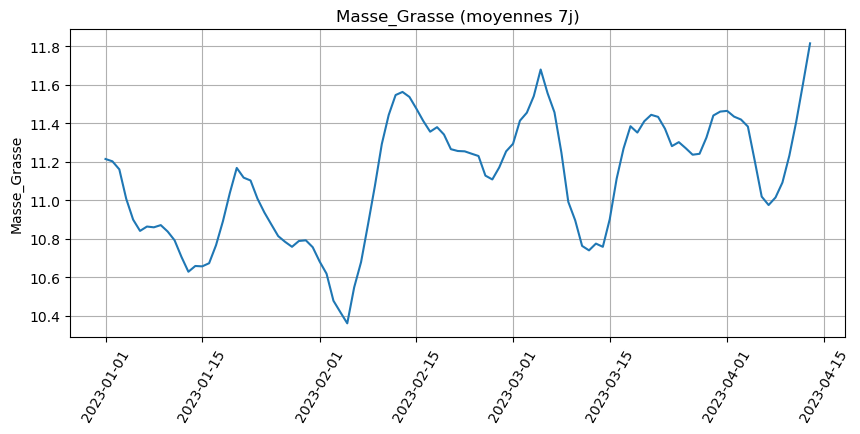

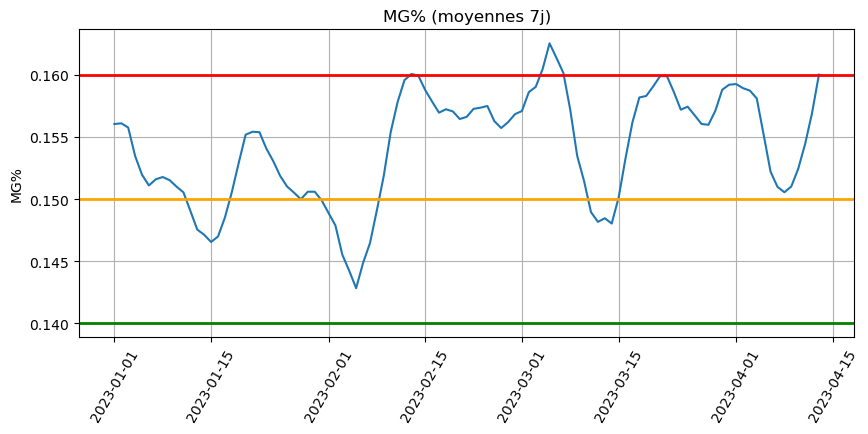

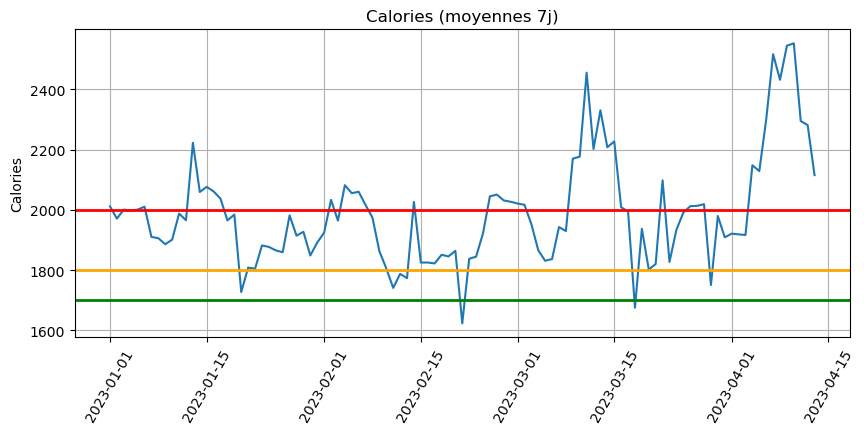

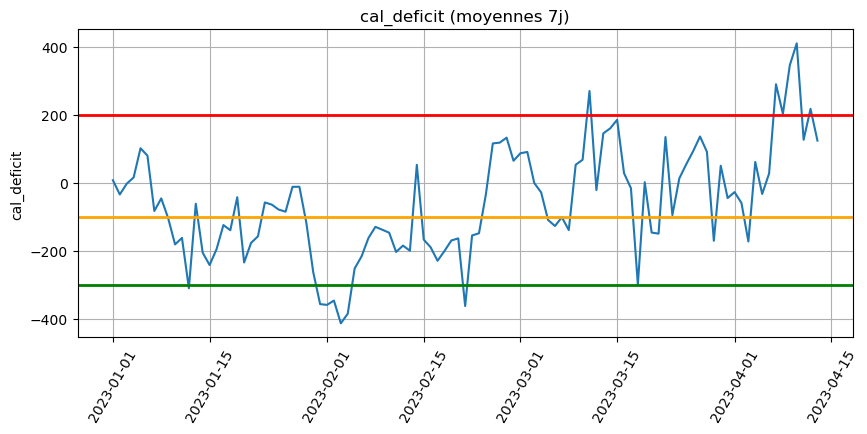

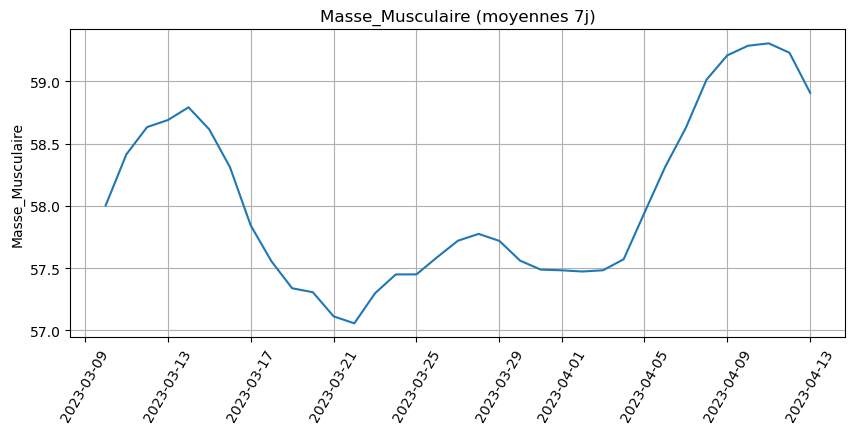

In [32]:
plot_general(longueur=7)

In [33]:
vars = ['Masse_Grasse', 'MG%', 'Calories', 'cal_deficit', 'Masse_Musculaire'] # 'Masse_Grasse', 'BMR', 'Masse_Totale', 'exo_cals_nets', 'Masse_Musculaire', 

ipywidgets.interact(plot_general, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1))

interactive(children=(IntSlider(value=15, description='longueur', max=90, min=1, step=7), IntSlider(value=2023…

<function __main__.plot_general(longueur=15, year=2023, month=1, day=1)>

In [34]:
def plot_general2(longueur=15,
                 year=2022,
                 month=11,
                 day=1,
):
    # vars = ['Masse_Totale', 'MG%', 'BMR', 'Calories', 'cal_deficit']
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    fig, ax = plt.subplots(figsize=(12,5))
    
    x = df_all2.index
    y1 = df_all2['MG%']
    ax.plot(y1, marker='x', color='red', label='MG%')
    ax.set_ylabel('MG%')
    ax.set_ylim(bottom=0.11, top=0.16)
    ax.tick_params(axis='x', labelrotation=60)
    ax.legend()
    ax.grid()
    
    y2 = df_all2['cal_deficit']
    ax2 = ax.twinx()
    ax2.plot(y2, marker='o', color='blue', label='cal_deficit')
    ax2.set_ylabel('cal_deficit')
    ax2.set_ylim(bottom=-500.0, top=300.0)
    # ax2.legend()

In [35]:
ipywidgets.interact(plot_general2, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1), day=(1))

interactive(children=(IntSlider(value=15, description='longueur', max=90, min=1, step=7), IntSlider(value=2022…

<function __main__.plot_general2(longueur=15, year=2022, month=11, day=1)>

In [36]:
def plot_general3(longueur=15,
                 year=2022,
                 month=11,
                 day=1
):
    # vars = ['Masse_Totale', 'MG%', 'BMR', 'Calories', 'cal_deficit']
    
    subset = ['Masse_Totale', 'Masse_Grasse'] # on permet des NaN en masse osseuse, etc en attendant d'avoir des data
    df_all2 = df_all.rolling(longueur).mean().dropna(subset = subset)
    start_date = datetime.date(year=year, month=month, day=day)

    df_all2 = df_all2[df_all2.index >= start_date]

    fig, ax = plt.subplots(figsize=(12,5))
    
    x = df_all2.index
    y1 = df_all2['MG%']
    ax.plot(y1, marker='x', color='red', label='MG%')
    ax.set_ylabel('MG%')
    ax.set_ylim(bottom=0.11, top=0.16)
    ax.tick_params(axis='x', labelrotation=60)
    ax.legend()
    ax.grid()
    
    y2 = df_all2['Calories']
    ax2 = ax.twinx()
    ax2.plot(y2, marker='o', color='blue', label='cal_deficit')
    ax2.set_ylabel('Calories')
    ax2.set_ylim(bottom=1700.0, top=2500.0)
    # ax2.legend()

In [37]:
ipywidgets.interact(plot_general3, longueur=(1,90,7), year=(2020,2023,1), month=(1,12,1), day=(1))

interactive(children=(IntSlider(value=15, description='longueur', max=90, min=1, step=7), IntSlider(value=2022…

<function __main__.plot_general3(longueur=15, year=2022, month=11, day=1)>